# Primera parte del ejercicio

In [1]:
import numpy as np
import pandas as pd
import pycaret

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

Carga de Datos

In [2]:
data =pd.read_csv("./data/train.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Preprocesamiento de los datos con Pycaret

In [5]:
from pycaret.classification import setup

In [6]:
## Carga de los datos(clf1) en Pycaret, como target "Survived", imputacion mediante la media
#variables categoricas['Sex','Embarked'],ignorar variables:['PassengerId','Name','Ticket','Cabin']

clf1 = setup(data = data, 
             target = 'Survived',
             numeric_imputation = 'mean',
             categorical_features = ['Sex','Embarked'], 
             ignore_features = ['PassengerId','Name','Ticket','Cabin'],
             verbose = True)

,Description,Value
0,Session id,8204
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(891, 12)"
4,Transformed data shape,"(891, 10)"
5,Transformed train set shape,"(623, 10)"
6,Transformed test set shape,"(268, 10)"
7,Ignore features,4
8,Ordinal features,1
9,Numeric features,5


In [7]:
clf1.models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [8]:
dir(clf1)

['USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_custom_pipeline',
 '_all_metrics',
 '_all_models',
 '_all_models_internal',
 '_attributes_to_not_save',
 '_available_plots',
 '_balance',
 '_bin_numerical_features',
 '_calculate_metrics',
 '_check_environment',
 '_check_setup_ran',
 '_choose_better',
 '_clean_column_names',
 '_convert_log_experiment',
 '_create_app_predict_kwargs',
 '_create_model',
 '_create_model_get_train_X_y',
 '_create_model_with_cv',
 '_create_model_without_cv',
 '_date_feature_engineering',
 '_display_container',
 '_encode_t

# Entrenamiento de modelos

In [9]:
clf1.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8299,0.8601,0.7072,0.8328,0.7607,0.6304,0.6393,1.2230
ada,Ada Boost Classifier,0.8123,0.8376,0.7493,0.7650,0.7545,0.6028,0.6055,1.3650
lightgbm,Light Gradient Boosting Machine,0.8026,0.8562,0.7074,0.7730,0.7351,0.5783,0.5835,1.2670
lr,Logistic Regression,0.7994,0.8465,0.7158,0.7578,0.7340,0.5734,0.5761,4.4340
ridge,Ridge Classifier,0.7914,0.0000,0.6868,0.7560,0.7170,0.5526,0.5566,0.9160
lda,Linear Discriminant Analysis,0.7914,0.8466,0.6868,0.7560,0.7170,0.5526,0.5566,1.1430
nb,Naive Bayes,0.7833,0.8214,0.6946,0.7406,0.7120,0.5390,0.5442,0.9480
rf,Random Forest Classifier,0.7816,0.8516,0.7031,0.7337,0.7114,0.5365,0.5438,1.3380
dt,Decision Tree Classifier,0.7736,0.7563,0.6949,0.7159,0.7022,0.5200,0.5232,1.1090
et,Extra Trees Classifier,0.7736,0.8272,0.6986,0.7216,0.7028,0.5207,0.5278,1.5780


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=8204, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [10]:
lgbm  = pycaret.classification.create_model('lightgbm') 

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,12:52:37
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8095,0.8777,0.7500,0.7500,0.7500,0.5962,0.5962
1,0.6984,0.7137,0.5417,0.6190,0.5778,0.3448,0.3467
2,0.9048,0.9412,0.7917,0.9500,0.8636,0.7914,0.7992
3,0.8710,0.8997,0.7826,0.8571,0.8182,0.7185,0.7203
4,0.8387,0.8640,0.6667,0.8889,0.7619,0.6437,0.6589
5,0.7903,0.9079,0.8333,0.6897,0.7547,0.5744,0.5823
6,0.7258,0.7807,0.6667,0.6400,0.6531,0.4266,0.4268
7,0.6613,0.7692,0.5417,0.5652,0.5532,0.2807,0.2808
8,0.8710,0.9101,0.7083,0.9444,0.8095,0.7149,0.7319


# Optimización de hiperparam

In [11]:
from pycaret.classification import tune_model

In [12]:
tuned_lgbm = tune_model(lgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7778,0.8435,0.7500,0.6923,0.7200,0.5363,0.5375
1,0.7619,0.7634,0.5417,0.7647,0.6341,0.4652,0.4804
2,0.8571,0.9103,0.6667,0.9412,0.7805,0.6791,0.7013
3,0.8387,0.9130,0.6087,0.9333,0.7368,0.6279,0.6577
4,0.7903,0.8860,0.5417,0.8667,0.6667,0.5253,0.5562
5,0.7742,0.8487,0.7083,0.7083,0.7083,0.5241,0.5241
6,0.8065,0.7763,0.6667,0.8000,0.7273,0.5792,0.5850
7,0.8226,0.8087,0.6667,0.8421,0.7442,0.6112,0.6209
8,0.8710,0.8942,0.7083,0.9444,0.8095,0.7149,0.7319


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [13]:
tuned_lgbm

LGBMClassifier(bagging_fraction=0.7, bagging_freq=7, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=1.0,
               importance_type='split', learning_rate=0.5, max_depth=-1,
               min_child_samples=81, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=160, n_jobs=-1, num_leaves=6, objective=None,
               random_state=8204, reg_alpha=0.05, reg_lambda=0.0001,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [14]:
from pycaret.classification import plot_model

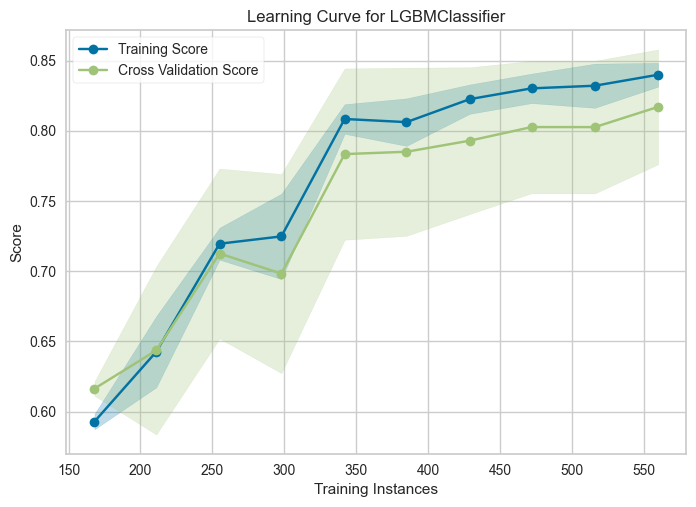

In [15]:
plot_model(estimator=tuned_lgbm,
           plot="learning")

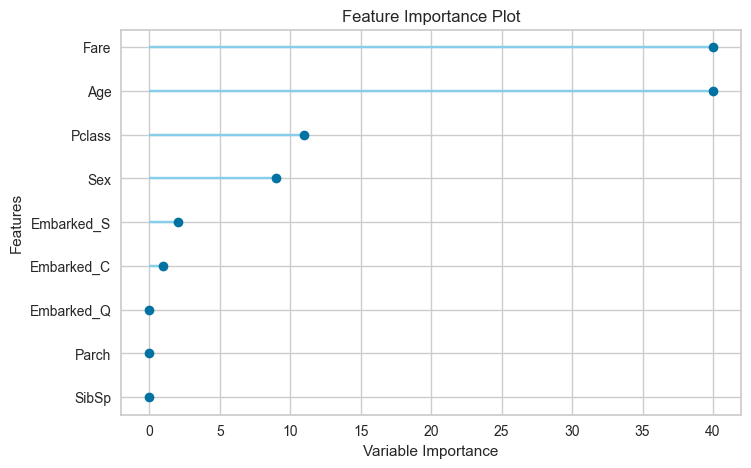

In [16]:
plot_model(estimator=tuned_lgbm,
           plot="feature")

In [17]:
help(plot_model)

Help on function plot_model in module pycaret.classification.functional:

plot_model(estimator, plot: str = 'auc', scale: float = 1, save: bool = False, fold: Union[int, Any, NoneType] = None, fit_kwargs: Optional[dict] = None, plot_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, verbose: bool = True, display_format: Optional[str] = None) -> Optional[str]
    This function analyzes the performance of a trained model on holdout set.
    It may require re-training the model in certain cases.
    
    Example
    -------
    >>> from pycaret.datasets import get_data
    >>> juice = get_data('juice')
    >>> from pycaret.classification import *
    >>> exp_name = setup(data = juice,  target = 'Purchase')
    >>> lr = create_model('lr')
    >>> plot_model(lr, plot = 'auc')
    
    
    estimator: scikit-learn compatible object
        Trained model object
    
    
    plot: str, default = 'auc'
        List of available plots (ID - Name):
    
        * 'pipeline'

List of available plots (ID - Name):
    
* 'pipeline' - Schematic drawing of the preprocessing pipeline
* 'auc' - Area Under the Curve
* 'threshold' - Discrimination Threshold
* 'pr' - Precision Recall Curve
* 'confusion_matrix' - Confusion Matrix
* 'error' - Class Prediction Error
* 'class_report' - Classification Report
* 'boundary' - Decision Boundary
* 'rfe' - Recursive Feature Selection
* 'learning' - Learning Curve
* 'manifold' - Manifold Learning
* 'calibration' - Calibration Curve
* 'vc' - Validation Curve
* 'dimension' - Dimension Learning
* 'feature' - Feature Importance
* 'feature_all' - Feature Importance (All)
* 'parameter' - Model Hyperparameter
* 'lift' - Lift Curve
* 'gain' - Gain Chart
* 'tree' - Decision Tree
* 'ks' - KS Statistic Plot

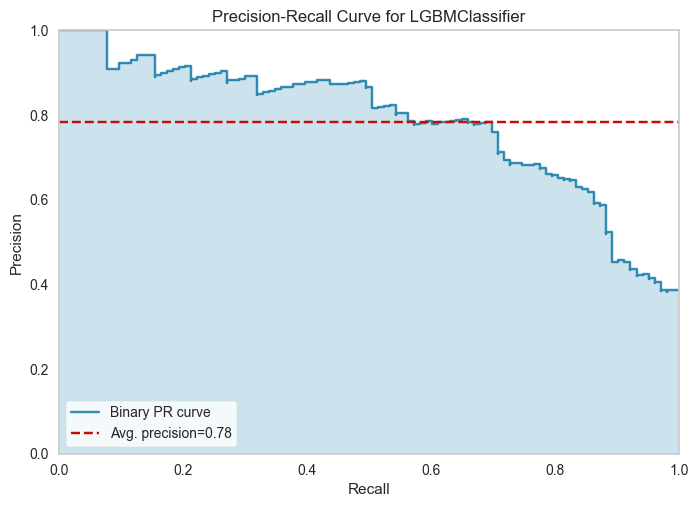

In [18]:
plot_model(estimator=tuned_lgbm,
           plot="pr")

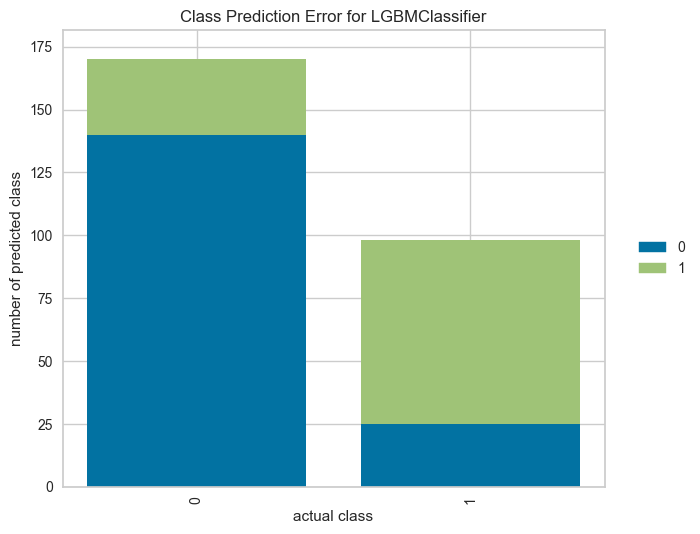

In [19]:
plot_model(estimator=tuned_lgbm,
           plot="error",)

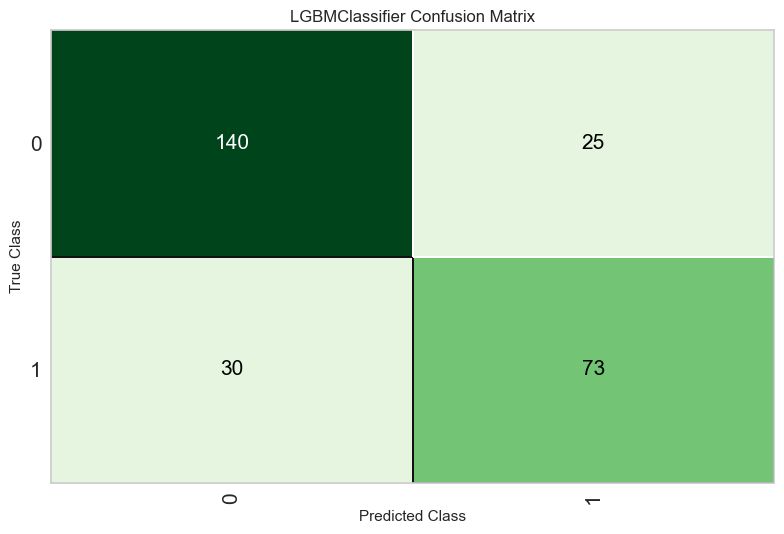

In [20]:
plot_model(estimator = tuned_lgbm, 
           plot = 'confusion_matrix')

In [21]:
!pip install shap

You should consider upgrading via the 'E:\fraude\end_pycaret\Scripts\python.exe -m pip install --upgrade pip' command.


In [22]:
#!pip install pycaret[analysis]

In [23]:
from pycaret.classification import interpret_model

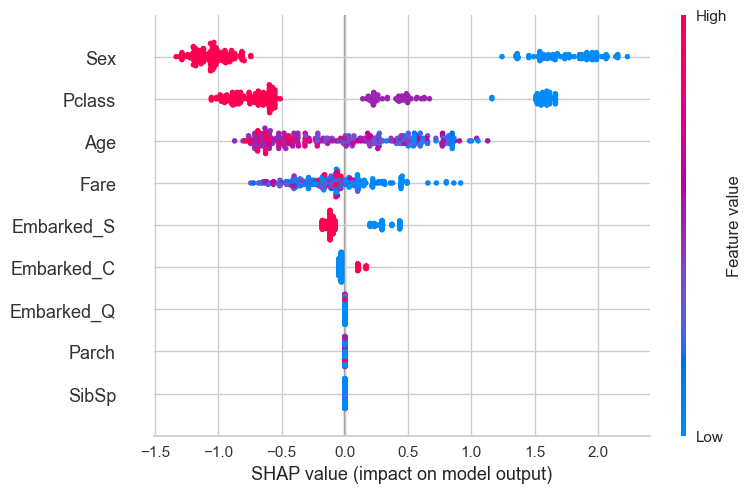

In [24]:
interpret_model(tuned_lgbm)

In [26]:
from pycaret.classification import save_model

In [27]:
save_model(tuned_lgbm, 'Titaniclgbm')
# code to load the model for future uses or when making predictions
# trained_model = load_model('Titaniclgbm')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\Usuario\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Pclass', 'Age', 'SibSp', 'Parch',
                                              'Fare'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated'))),
                 ('cat...
                                 boosting_type='gbdt', class_weight=None,
             

In [28]:
from pycaret.classification import load_model

In [29]:
trained_model = load_model('Titaniclgbm')

Transformation Pipeline and Model Successfully Loaded


In [30]:
trained_model

Pipeline(memory=FastMemory(location=C:\Users\Usuario\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Pclass', 'Age', 'SibSp', 'Parch',
                                             'Fare'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean',
                                                              verbose='deprecated'))),
                ('cat...
                                boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, feature_fraction=1.0,
                                importance_type='split', learning_rate=0.5,
                                max_depth=-1, min_child_samples=81,
                                min_child_weight=0.001, min_split_gain=0.3,
                                n_estimators=160, n_jobs=-1, num_leaves=6,
                                objective=None, random_state=8204,
                                reg_alpha=0.05, reg_lambda=0.0001,
                                subsample=1.0, subsample_for_bin=200000,
                                subsample_freq=0))],
         verbose=False)

In [36]:
from pycaret.classification import predict_model

In [37]:
predictions = predict_model(tuned_lgbm, data=test)
predictions.head()

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,prediction_label,prediction_score
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0.8635
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,0.6291
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0.8255
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0.8329
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0.5227


In [38]:
test = pd.read_csv('data/test.csv') 
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [39]:
sub   = pd.read_csv('data/gender_submission.csv')

In [40]:
sub

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [42]:
sub['Survived'] = round(predictions['prediction_score']).astype(int)
sub.to_csv('submission.csv',index=False)

In [46]:
sub.Survived.value_counts()

1    418
Name: Survived, dtype: int64